
# **Tutorial para graficar funciones complejas racionales en Python, utilizando el metodo del dominio coloreado.**

**Harold Andres Aguilar Beltran**



Para visualizar los numeros complejos, vamos a utilizar una funcion color que asocia a cada numero complejo un color determinado. El plano complejo puede visualizarse como una paleta de colores
construida a partir del sistema HSL (del inglés Hue, Saturation, Lightness – Matiz, Saturación,
Luminosidad). 
En el plano complejo coloreado, el matiz representa el argumento del número complejo  $ z $ y la
luminosidad representa el valor módulo $\left|z \right|$. Recordemos que un número complejo se puede representar
en forma polar $z = r e^{i \theta}$      donde     $r  =  \sqrt{x^2+y^2}$ denota  el módulo y  $\theta$   el argumento o el ángulo.

In [2]:
%matplotlib inline
import math
from math import sinh, cos, sin
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

El primer paso ademas de cargar los paquetes que vamos a utilizar, es definir una funcion para el argumento de z, el cual varia entre $0$ y $2\pi$, es decir el matiz, definida de la siguiente forma:

In [3]:
def Hcomplex(z):# calcula el matiz correspondiente al numero complejo z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

Por ejemplo, utilicemos la funcion $g(x)=(1-\frac{1}{(1+x^2)})^2$.
Codifiquemos por colores los puntos de la región rectangular dada por: $D=\{x+ix\in \mathbb{C}: x\in [-1,4],y\in[-1,3]\}$ .



In [4]:
def g(x): #Definimos la función
    return (1- 1/(1+x**2))**0.2 

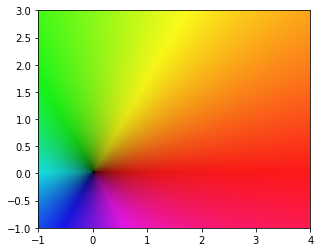

In [5]:
x = np.arange(-1,4, 0.05)
y = np.arange(-1,3, 0.05)
x, y = np.meshgrid(x,y)
z = x + 1j*y
H = Hcomplex(z)
V = g(np.absolute(z))
S = 0.9*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-1, 4, -1, 3])

Si se quiere visualizar una función compleja $f$ que está definida en una región rectangular $[a, b] \times [c, d] \subseteq \mathbb{C}$, y además utilizamos valores en el plano complejo extendido, $\bar{\mathbb{C}} = \mathbb{C} \cup \{\infty\}$, se procede como sigue:





-  Definimos una cuadrícula estrecha de este rectángulo.

- Cada pixel $z$ de la cuadrícula se coloreará con el color HSV $(h, s_0, v)$, donde $h$ y $v$ codifican el argumento y el módulo de $f(z)$ respectivamente.

- Los puntos $z$ para los cuales $| f (z) | = \infty$ podrían colorearse con blanco



Si denotamos por $col: \bar{\mathbb{C}} \to HSV$ la función que codifica los puntos en el plano complejo extendido por una tripla $(h, s, v)$, entonces la coloración del dominio está representada por el mapeo $z\to f (z ) \to col (f (z))$, es decir, al punto $z$ en el dominio se asocia el código de color de $f (z)$.

**Código de función para definir la cuadricula y evaluar la función compleja**

Con el siguiente código creamos una cuadricula con un determinado numero de pixeles a los cuales asociamos un número complejo, además evaluamos la función compleja en cada uno de estos nodos o pixeles, esto mediante la función "func_vals" está será la malla que colorearemos posteriormente 

In [56]:
def func_value(f, re, im,  N): #evalúa la función compleja en los nodos de la cuadrícula
    # re e im son tuplas, re = (a, b) e im = (c, d), definiendo la región rectangular
    # N es el número de puntos discretos por intervalo de unidad 
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # resolucion horizontal(pixeles) 
    resH = N * h # resolucion vertical (pixeles)
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return f(z)

**Código de función para colorear la cuadricula**

El siguiente código funciona para asginar a cada numero complejo o pixel un color que se hace utilizando arreglos con numpy y  mediante el modulo de matplotlib "hsv_to_rgb". Es una función de coloración clasica que solo muestra valga la redundancia el color del dominio.

In [54]:
def domaincol_clasic(w, s):#Coloración de dominio clásico
    # w es la matriz de valores f (z)
    # s es la saturación constante
    
    H = Hcomplex(w)
    S = s * np.ones(H.shape)
    modul = np.absolute(w)
    V = (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0, 0, 1)=(1, 1, 1)=white

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB         

**Codigo para gráficar el dominio coloreado**

En la siguiente celda podemos encontrar el código de la función "plot_domain()" que me permite gráficar el dominio coloreado con respecto a la asignación de color que dimos con la anterior función.

In [58]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], title='',
                s=0.9, N=200, daxis=None):
    w = func_value(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

#**Gráficando el dominio coloreado mediante función de coloración clásica**

Graficamos la funcion con el siguiente codigo. 
En esta parte del codigo podemos cambiar la funcion a graficar si redefinimos "lambda z" como la funcion racional compleja que queramos para ver su dominio coloreado 

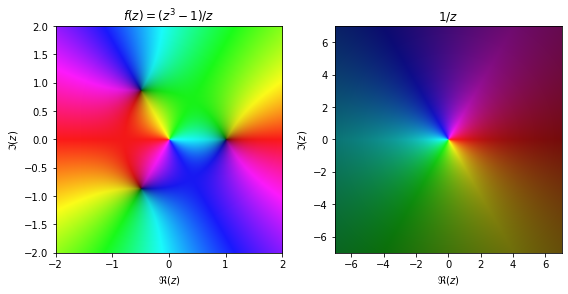

In [59]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**3 - 1)/z
plot_domain(domaincol_clasic, f, re=ab, im= cd, title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_clasic, lambda z:1/z, re=[-7, 7], im=[-7, 7], title='$1/z$', daxis=True)
plt.tight_layout() 

Mirando la imagen de la izquierda, observamos que los puntos más oscuros se asignan mediante $f$ a puntos cercanos al origen. La función $f$ visualizada aquí tiene tres ceros (las raíces de la unidad) que son puntos negros, y un polo en z = 0 (teóricamente es de color blanco).

**ejemplos de graficas de funciones racionales complejas con función de coloración clásica**

Sean las siguientes funciones $f,g,h,k:\bar{\mathbb{C}}\to \bar{\mathbb{C}}$  , definidas por:   

- $f(z)=\frac{z^2 - 4}{z^3 - 9z}$

- $g(z)=\frac{(z^2-3)}{(z^2+3z+5)}$

- $h(z)=\frac{(2z^2 +3z -5)}{(z^2+2)}$

- $k(z)=\frac{(z-1)}{(z^2+z+1)}$


Las gráficas de $f$ y $g$ mediante el dominio coloreado es la siguiente:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


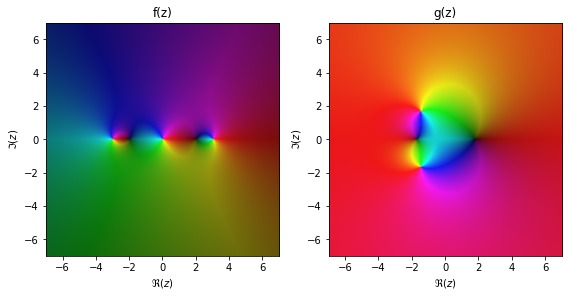

In [43]:
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**2- 4)/(z**3 -9*z)
plot_domain(domaincol_clasic, f, re=[-7, 7], im=[-7, 7], title= 'f(z)', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_clasic, lambda z:(z**2-3)/(z**2+3*z+5), re=[-7, 7], im=[-7, 7], title='g(z)', daxis=True)
plt.subplot(1,2,2)
plt.tight_layout() 

Las gráficas de  $h$ y  $k$ mediante el dominio coloreado es la siguiente:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


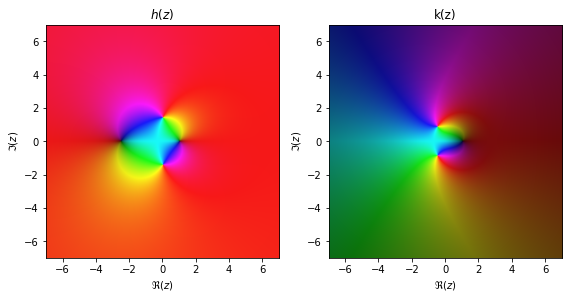

In [44]:
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
#f = lambda z: (z**2- 4)/(z**3 -9*z)
plot_domain(domaincol_clasic, lambda z:(2*z**2 +3*z -5)/(z**2+2), re=[-7, 7], im=[-7, 7], title='$h(z)$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_clasic, lambda z: (z-1)/(z**2+z+1), re=[-7, 7], im=[-7, 7], title='k(z)', daxis=True)
#plot_domain(domaincol_c, lambda z:(z**2-3)/(z**2+3*z+5), re=[-7, 7], im=[-7, 7], title='k(z) ', daxis=True)
plt.subplot(1,2,2)
plt.tight_layout() 

# **Gráficando coloración de dominios con curvas de nivel de módulo constante**

Podemos obtener una nueva característica a la coloración clásica del dominio esto si queremos señalar cómo el módulo de una función compleja cambia en el dominio.

Esto lo podemos ver haciendo un codigo para otra función de coloración, para lo que vamos a tener en cuenta lo siguiente:

Para la función de color con valores HSV definimos el brillo en un punto $z$ como la parte fraccionaria de $log_2(\left| f(z) \right|)$ , es decir redefinimos $v$   como el conjunto: $v =  \{log_2(\left| f(z) \right|)\}$, donde $\{x\} = x − [x]$ ($[x]$ es la parte entera de x).


Entonces, si el módulo cruza un valor igual a una potencia de 2, $\left| f(z) \right|=2^k$, con  $k$ entero, el brillo tiene una discontinuidad y se oscurece. Alrededor de los ceros y los polos hay anillos delimitados por líneas oscuras de módulo constante. Dentro de un anillo, el brillo cambia según la dirección de crecimiento del módulo.


La función color que implementa este metodo es definida como sigue:

In [51]:
def domaincol_nivel(w,  s): #domain coloring with modulus track
   
    # w the array of values
    #s is the constant Saturation
   
    H = Hcomplex(w) 
    modulus = np.absolute(w)
    c = np.log(2)
    logm = np.log(modulus)/c#log base 2
    logm = np.nan_to_num(logm)
   
    V = logm - np.floor(logm)
    S = s*np.ones(H.shape)
   
    HSV = np.dstack((H, S, V**0.2)) # V**0.2>V for V in[0,1];this choice  avoids too dark colors
    RGB = hsv_to_rgb(HSV) 
    return RGB

Utilizamos la función para gráficar que hemos creado anteriormente pero reemplazando el primer argumento por la función creada en la celda anterior.

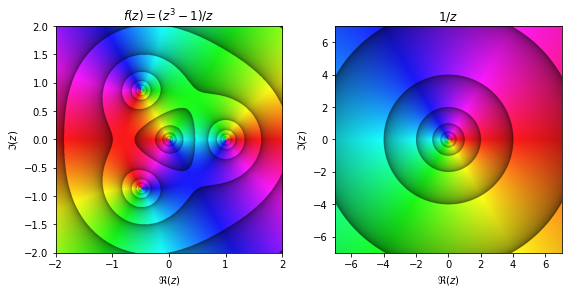

In [52]:
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**3 - 1)/z
plot_domain(domaincol_nivel, f, re=ab, im= cd, title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_nivel, lambda z:1/z, re=[-7, 7], im=[-7, 7], title='$1/z$', daxis=True)
plt.tight_layout() 

**Ejemplos de graficas de funciones racionales complejas con función de coloración con curvas de nivel de modulo constante**

Utilizaremos las funciones complejas descritas anteriormente. Sean $f,g,h,k:\bar{\mathbb{C}}\to \bar{\mathbb{C}}$  , definidas por:   

- $f(z)=\frac{z^2 - 4}{z^3 - 9z}$

- $g(z)=\frac{(z^2-3)}{(z^2+3z+5)}$

- $h(z)=\frac{(2z^2 +3z -5)}{(z^2+2)}$

- $k(z)=\frac{(z-1)}{(z^2+z+1)}$


Las gráficas de $f$ y $g$ mediante el dominio coloreado con curvas de nivel es la siguiente:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


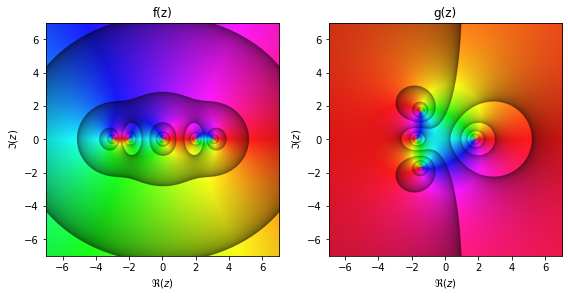

In [53]:
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**2- 4)/(z**3 -9*z)
plot_domain(domaincol_nivel, f, re=[-7, 7], im=[-7, 7], title= 'f(z)', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_nivel, lambda z:(z**2-3)/(z**2+3*z+5), re=[-7, 7], im=[-7, 7], title='g(z)', daxis=True)
plt.subplot(1,2,2)
plt.tight_layout() 

Las gráficas de $h$ y $k$ mediante el dominio coloreado con curvas de nivel es la siguiente:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


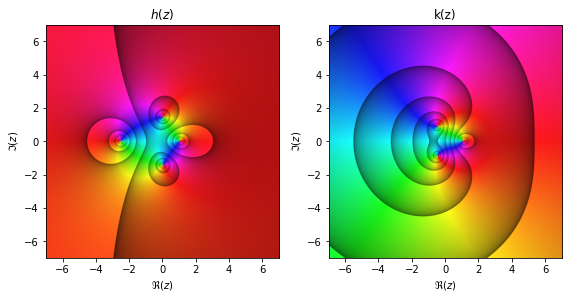

In [60]:
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
plot_domain(domaincol_nivel, lambda z:(2*z**2 +3*z -5)/(z**2+2), re=[-7, 7], im=[-7, 7], title='$h(z)$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_nivel, lambda z: (z-1)/(z**2+z+1), re=[-7, 7], im=[-7, 7], title='k(z)', daxis=True)
plt.subplot(1,2,2)
plt.tight_layout() 

**Otras graficas de funciones complejas con función de coloración con curvas de nivel de modulo constante**

Finalmente, observaremos algunas funciones trigonometricas, exponenciales, y polinomicas de grado superior las cuales destacan por sus formas llamativas:

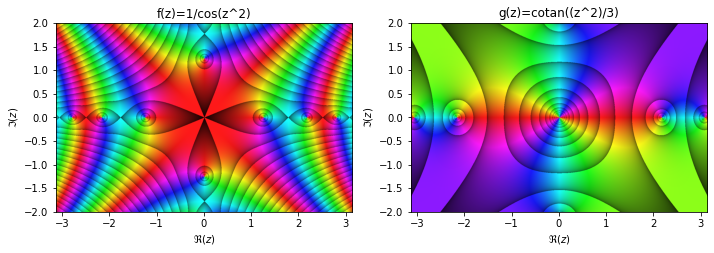

In [106]:
plt.rcParams['figure.figsize'] = 10, 6
ab = (-np.pi, np.pi)
cd = (-2, 2)

plt.subplot(1, 2, 1)
g = lambda z: 1/(np.cos(z**2))
plot_domain(domaincol_nivel, g,   re=ab, im=cd, title='f(z)=1/cos(z^2)', daxis=True)
plt.subplot(1, 2, 2)
f = lambda z: (np.cos((z**2)/3))/(np.sin((z**2)/3))
plot_domain(domaincol_nivel, f,   re=ab, im=cd, title='g(z)=cotan((z^2)/3)', daxis=True)
plt.tight_layout(1)   

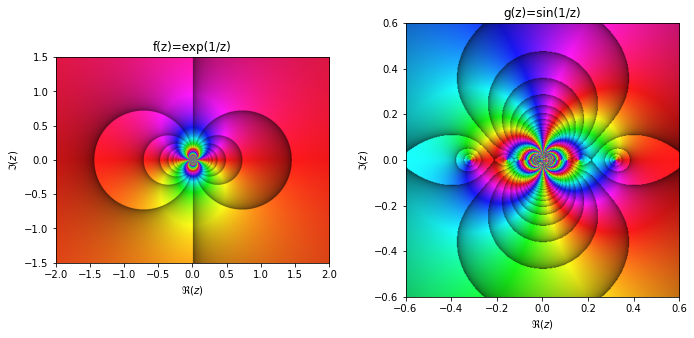

In [109]:
plt.rcParams['figure.figsize'] = 10, 6
plt.subplot(1, 2, 1)
ab = (-2, 2)
cd = (-1.5, 1.5)
f = lambda z: np.exp(1/z)
plot_domain(domaincol_nivel,  f,   re=ab, im=cd, title= 'f(z)=exp(1/z)', N=350, daxis=True)
plt.subplot(1, 2, 2)
ab = (-0.6, 0.6)
cd = (-0.6 ,0.6)
g = lambda z: np.sin(1.0/z)
plot_domain(domaincol_nivel,  g,   re=ab, im=cd, title='g(z)=sin(1/z)', N=350, daxis=True)
plt.tight_layout(2)

También podemos generar el gráfico para una misma función compleja con los diferentes metodos de coloración:

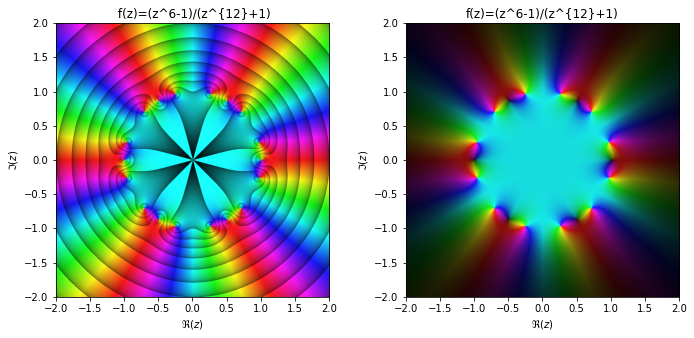

In [112]:
plt.subplot(1, 2, 1)
ab = (-2, 2)
cd = (-2, 2)
f = lambda z: (z**6 - 1) / (z**12 + 1)
plot_domain(domaincol_nivel,  f,   re=ab, im=cd, title=' f(z)=(z^6-1)/(z^{12}+1)', N=300, daxis=True)
plt.subplot(1, 2, 2)
ab = (-2, 2)
cd = (-2, 2)
plot_domain(domaincol_clasic,  f,   re=ab, im=cd, title='f(z)=(z^6-1)/(z^{12}+1)', N=300, daxis=True)
plt.tight_layout(2)